#Regression Splines in Python – A Beginners Introduction


## Overview  
Linear regression which is one of the simplest algorithms that teaches a lot about the relationship between dependent and non-dependent variables.

The result generally comes as a straight line. The problem is that in practical scenarios, having a straight line is not always possible.

To overcome that there are polynomial curves (smooth curves). But the polynomial curves can get super complex and hence are avoided.

In order to create a spline regression, the whole dataset is divided into smaller bins. And the regression line is predicted for each bin and the separate lines are joined together by knots. 

---  
Source:  
+ A Jupyter notebook to the introduction  [Regression Splines in Python](https://www.askpython.com/python/examples/regression-splines)  

History:
+ 2023-04-14 v2 dbe --- adapted version for BINA FS23  

--- 

## Import Libraries and Check Environment

In [29]:
import pandas as pd 
import os

In [30]:
%ls
# wechsel ins (colab lokale verzeichnis)
%cd /content/sample_data      
# anzeige der vorhandenen dateien
%ls

anscombe.json*                DATA_Wage.csv          README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv
/content/sample_data
anscombe.json*                DATA_Wage.csv          README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


## 1. Loading and Summarizing the Dataset  

The dataset is about the wages of people along with a lot of information about the people getting paid.  The dataset can be downloaded [here](https://raw.githubusercontent.com/selva86/datasets/master/Wage.csv)

In [31]:
data = pd.read_csv("DATA_Wage.csv")

In [32]:
num_rows = data.shape[0]
print(num_rows)

3000


In [33]:
data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [34]:
data.describe()

,ID,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


## 2. Creating X and Y values
To understand the spline plots better, we will have a look at two columns that don’t have any direct relation between them. Let’s have a look at the relation between the age and wage of a person.

The age won’t directly influence the wage of a person and hence will help us understand its implementation better.

In [37]:
X = data[['age']]
y = data[['wage']]

## 3. Splitting the data into train and test data
The next step is to split the data into training and testing datasets using the 80:20 rule where 80% of the data is used for training and the rest 20% is set for testing the model.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)


## 4. Data Visualization
In this step, let’s visualize the initial dataset that we just created using *matplotlib* and *seaborn* library functions.   
We will visualize both the testing and training dataset.

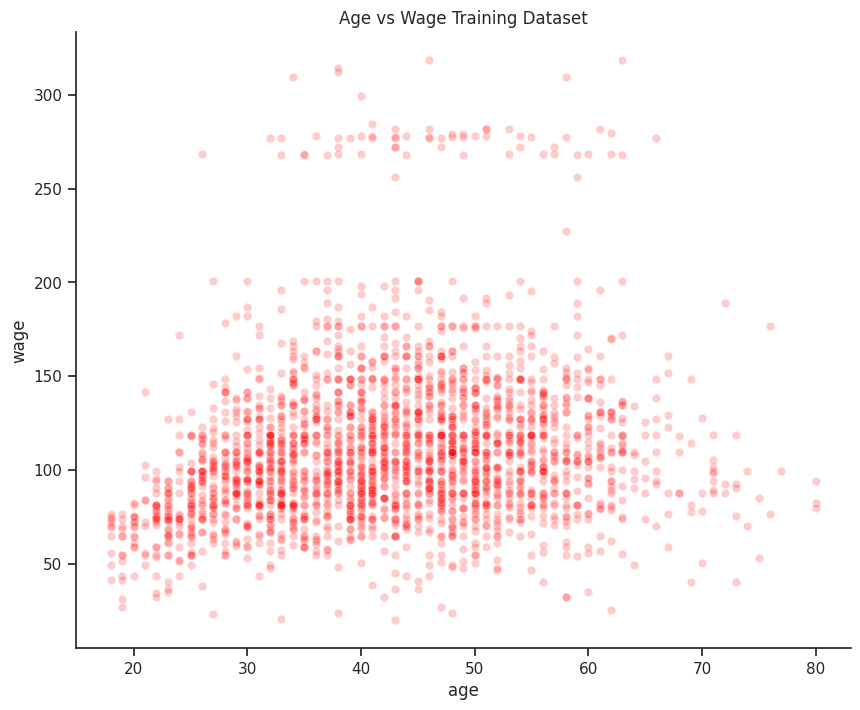

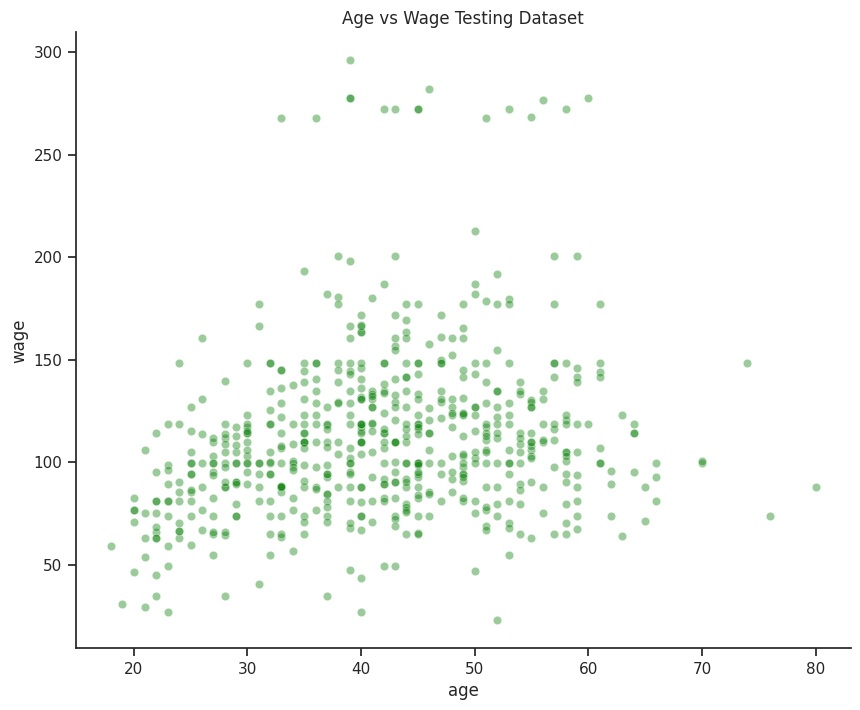

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
 
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train['age'], y=y_train['wage'], color="red",alpha=0.2)
plt.title("Age vs Wage Training Dataset")
 
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_test['age'], y=y_test['wage'], color="green",alpha=0.4)
plt.title("Age vs Wage Testing Dataset")
 
plt.show()

## 5. Applying Linear Regression on the Dataset
Applying linear regression to the dataset is simple using the *sklearn.linear_learn* model library. We will also be computing the mean squared error of the model using the training dataset.

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
 
print("Slope of the Regression Line is : ", lm.coef_)
print("Intercept of Regression Line is : ",lm.intercept_)
 
from sklearn.metrics import mean_squared_error
pred_test = lm.predict(X_test)
rmse_test =mean_squared_error(y_test, pred_test, squared=False)
 
print("Accuracy of Linear Regression on testing data is : ",rmse_test)


Slope of the Regression Line is :  [[0.68904221]]
Intercept of Regression Line is :  [82.09009765]
Accuracy of Linear Regression on testing data is :  40.68927607248243


Now, let’s plot the regression line for the dataset

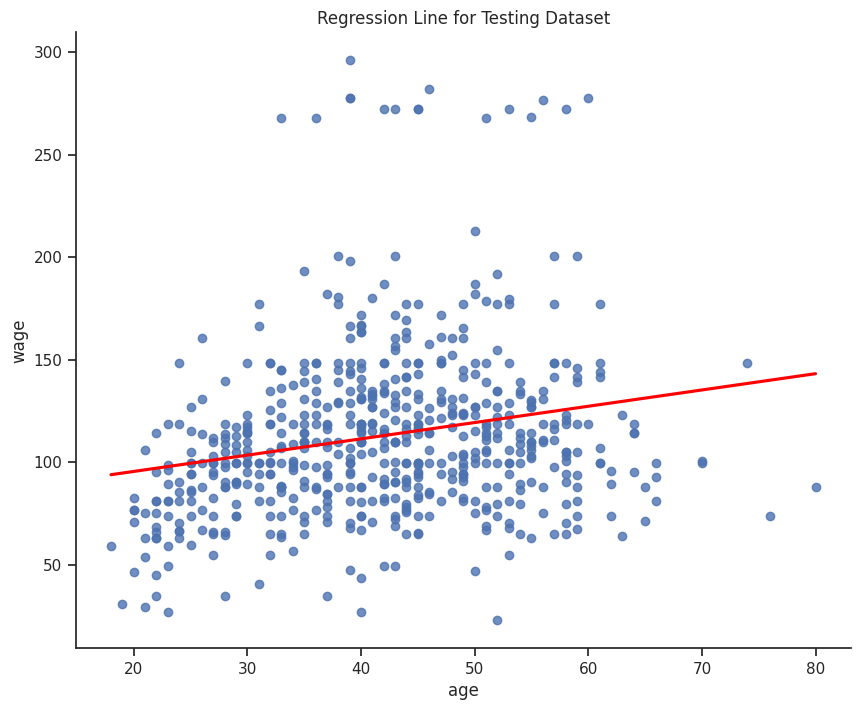

In [41]:
plt.figure(figsize=(10,8))
sns.regplot(x=X_test['age'], y=y_test['wage'], ci=None, line_kws={"color": "red"})
plt.title("Regression Line for Testing Dataset")
plt.show()

## 6. Applying Polynomial Regression
Let’s try to fit polynomial regression into the dataset using the code below and see if we can increase the accuracy to some extent.

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
pm = LinearRegression()
pm.fit(X_train_poly,y_train)
 
pred_test = pm.predict(X_test_poly)
rmse_test =mean_squared_error(y_test,pred_test,squared=False)
 
print("Accuracy of Polynomial Regression on testing data is : ",rmse_test)

Accuracy of Polynomial Regression on testing data is :  39.425107166824404


We can also plot the polynomial regression line

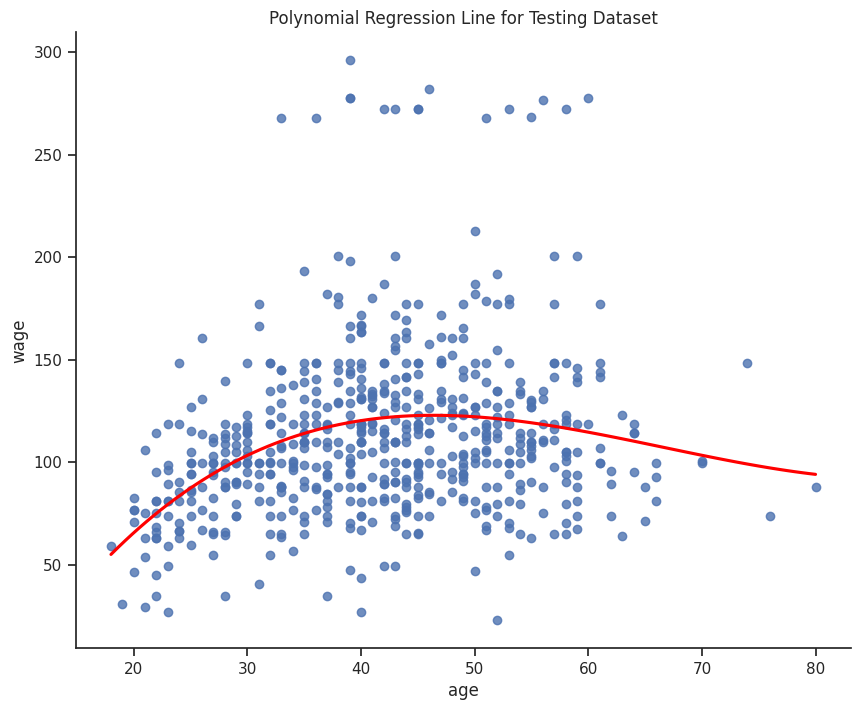

In [46]:
plt.figure(figsize=(10,8))
sns.regplot(x=X_test['age'], y=y_test['wage'], ci=None, line_kws={"color": "red"},order=2)
plt.title("Polynomial Regression Line for Testing Dataset")
plt.show()

## 7. Implementation of Cubic Spline
Implementation and plotting of cubic spline are very similar to the previous implementations. It won’t be difficult to understand the code below.

In [49]:
from patsy import dmatrix
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"train": X_train},return_type='dataframe')

import statsmodels.api as sm
cs = sm.GLM(y_train, transformed_x).fit()
pred_test = cs.predict(dmatrix("bs(test, knots=(25,40,60), include_intercept=False)",
                               {"test": X_test}, return_type='dataframe'))

rmse_test =mean_squared_error(y_test, pred_test, squared=False)
print("Accuracy for Cubic Spline on testing data is : ",rmse_test)

Accuracy for Cubic Spline on testing data is :  39.45061323339927


The results are shown visually below.

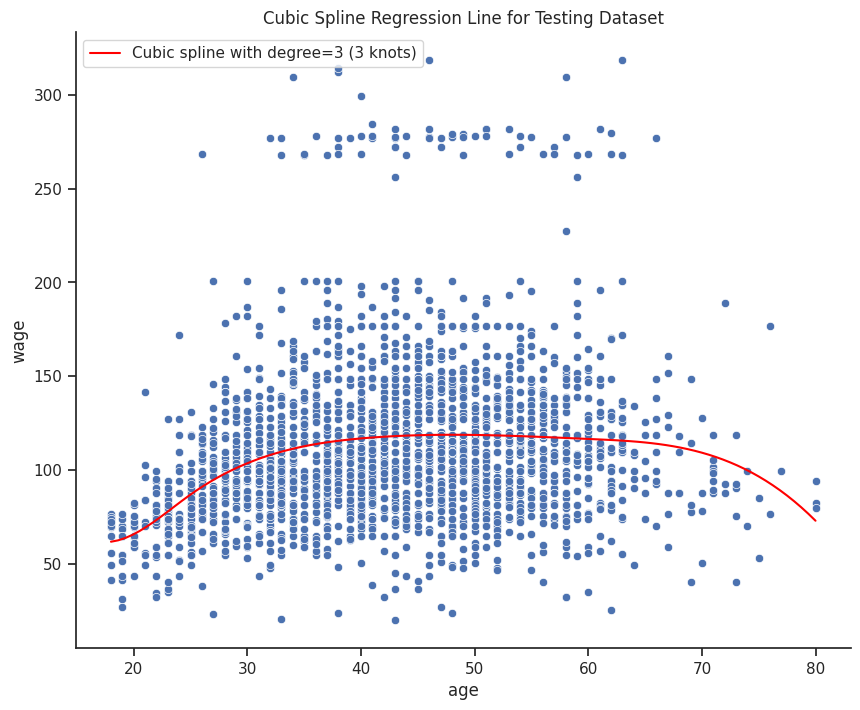

In [48]:
import numpy as np
plt.figure(figsize=(10,8))
xp = np.linspace(X_test.min(),X_test.max(), 100)
pred = cs.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", 
                          {"xp": xp}, return_type='dataframe'))
sns.scatterplot(x=X_train['age'], y=y_train['wage'])
plt.plot(xp, pred, label='Cubic spline with degree=3 (3 knots)', color='red')
plt.legend()
plt.title("Cubic Spline Regression Line for Testing Dataset")
plt.show()